# Load dependencies

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import load_wine
from sklearn.preprocessing import scale
from tensorflow.keras import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

# Data preprocessing

In [2]:
### Scale and center features, transform labels into a one-hot encoding vector:
def preprocess_data(X, Y):
    X_scale = scale(X)
    Y_one_hot = to_categorical(Y)
    return X_scale, Y_one_hot

# Load and preprocess the Wine dataset

In [3]:
# Load the Wine dataset:
X, Y = load_wine(return_X_y=True)
# Shape of the features fed to the MLP:
input_shape = X[0].shape
# Number of classes:
num_classes = len(np.unique(Y))
# Preprocess data:
X, Y = preprocess_data(X, Y)

# MLP (multi-layer perceptron) builder

In [7]:
### Construct a simple fully-connected MLP with SGD:
def build_MLP(input_shape, num_classes, activation='relu', additional=False):
    MLP = Sequential()
    # Hidden layers (fully connected):
    MLP.add(Dense(10, input_shape=input_shape, activation=activation))
    if additional:
        MLP.add(Dense(5, input_shape=input_shape, activation=activation))
    # Output layer (fully-connected):
    MLP.add(Dense(num_classes, activation='softmax'))
    MLP.compile(loss=categorical_crossentropy,
                optimizer='SGD',
                metrics=['accuracy'])
    return MLP

# Train, validate and evaluate a MLP model, and plot the results:

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_42 (Dense)             (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________

Test Set evaluation:
	Loss: 0.447735 | Accuracy: 0.888889


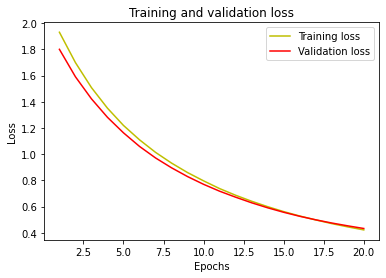

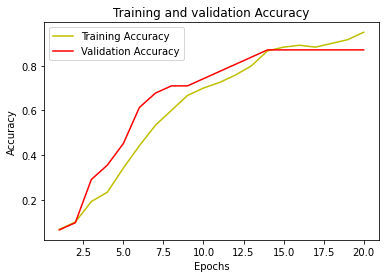

In [12]:
# Fix the seed for reproducibility:
seed = 666
np.random.seed(seed)
set_seed(seed)
# Number of epochs:
num_epochs = 20
# Train batch size:
train_batch_size = 16
#Parameters for split
test_sz = 0.15
val_sz = 0.2

# Split data into train/val/test sets:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y,random_state=seed,shuffle=True,
                                                            test_size=test_sz)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val,random_state=seed,shuffle=True,
                                                  test_size=val_sz)
# Load an MLP:
model = build_MLP(input_shape, num_classes)
# Display architecture:
model.summary()
# Train and validate MLP, store the training history in a variable:
training_history = model.fit(x=X_train,y=Y_train,
                             batch_size=train_batch_size,
                             epochs=num_epochs,
                             validation_data=(X_val,Y_val),
                             use_multiprocessing=True,
                             verbose=0)
# Evaluate the model (on the test set):
test_eval = model.evaluate(x=X_test, y=Y_test, use_multiprocessing=True, verbose=0)
test_loss = test_eval[0]
test_acc = test_eval[1]
print('\nTest Set evaluation:')
print('\tLoss: %f | Accuracy: %f'%(test_loss,test_acc))
# Plot training history (train/validation loss and accuracy values throughout training):
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model selection of our MLP

Model: relu |False
	Val loss: 0.795914 | Val_acc: 0.903226
Model: relu |True
	Val loss: 1.028718 | Val_acc: 0.838710
Model: sigmoid |False
	Val loss: 1.363827 | Val_acc: 0.677419
Model: sigmoid |True
	Val loss: 1.241788 | Val_acc: 0.290323

Best model: relu | False

Test Set evaluation:
	Loss: 0.618952 | Accuracy: 0.777778


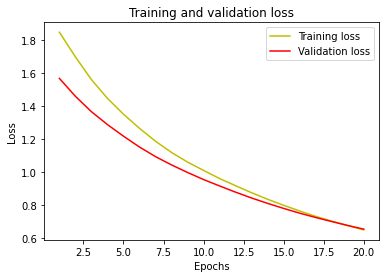

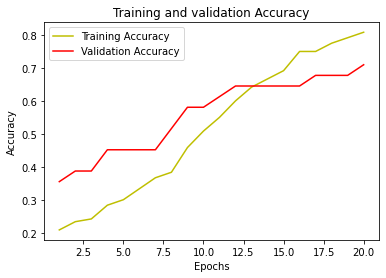

In [13]:
# Hyperparameters
params = [('relu',False), ('relu', True), ('sigmoid', False),('sigmoid',True)]
accs = []

# Evaluate model
for act, layer in params:
    model = build_MLP(input_shape, num_classes, activation=act, additional=layer)
    training_history = model.fit(x=X_train,y=Y_train,
                             batch_size=train_batch_size,
                             epochs=num_epochs,
                             validation_data=(X_val,Y_val),
                             use_multiprocessing=True,
                             verbose=0)
    val_acc = max(training_history.history['val_accuracy'])
    print('Model: %s |%s'%(act, layer))
    print('\tVal loss: %f | Val_acc: %f'%(max(training_history.history['val_loss']), val_acc))
    accs.append(val_acc)
    
# Get best model
i = accs.index(max(accs))
act = params[i][0]
layer = params[i][1]
print('\nBest model: %s | %s'%(act, layer))

model = build_MLP(input_shape, num_classes, activation=act, additional=layer)
training_history = model.fit(x=X_train,y=Y_train,
                             batch_size=train_batch_size,
                             epochs=num_epochs,
                             validation_data=(X_val,Y_val),
                             use_multiprocessing=True,
                             verbose=0)
# Evaluate the model (on the test set):
test_eval = model.evaluate(x=X_test, y=Y_test, use_multiprocessing=True, verbose=0)
test_loss = test_eval[0]
test_acc = test_eval[1]
print('\nTest Set evaluation:')
print('\tLoss: %f | Accuracy: %f'%(test_loss,test_acc))
# Plot training history (train/validation loss and accuracy values throughout training):
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()